# Clustering of Countries 

-  Data Understanding
-  EDA
-  Modelling
-  Final Results

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data Understanding

In [2]:
#let's read the dataset
dat = pd.read_csv('Country-data.csv')
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Let's convert imports,exports and health spending from  percentage values to actual values of their GDP per capita
.Because the percentage values don't give a clear picture of that country. 
For ex. afghanistan and albania have similar imports percentange but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [3]:
#Converting exports,imports and health spending percentages to absolute values.
dat['exports'] = dat['exports']*dat['gdpp']/100
dat['imports'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100

In [4]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
dat.shape

(167, 10)

(167, 10)

In [6]:
#basic data checks
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null 

In [7]:
#basic data cleaning checks
dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## EDA

In [8]:
#Since data is largely clean, let's run some basic univariate and bivariate analysis

In [9]:
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Except *inflation, life_expec, total_fer*, the rest of the columns do show the possibility of outliers when you compare the mean with the median. We'll be doing the outlier analysis just before getting to the clustering part.

In [10]:
features = ['child_mort', 'exports', 'health', 'imports','income','life_expec','total_fer','gdpp','inflation']

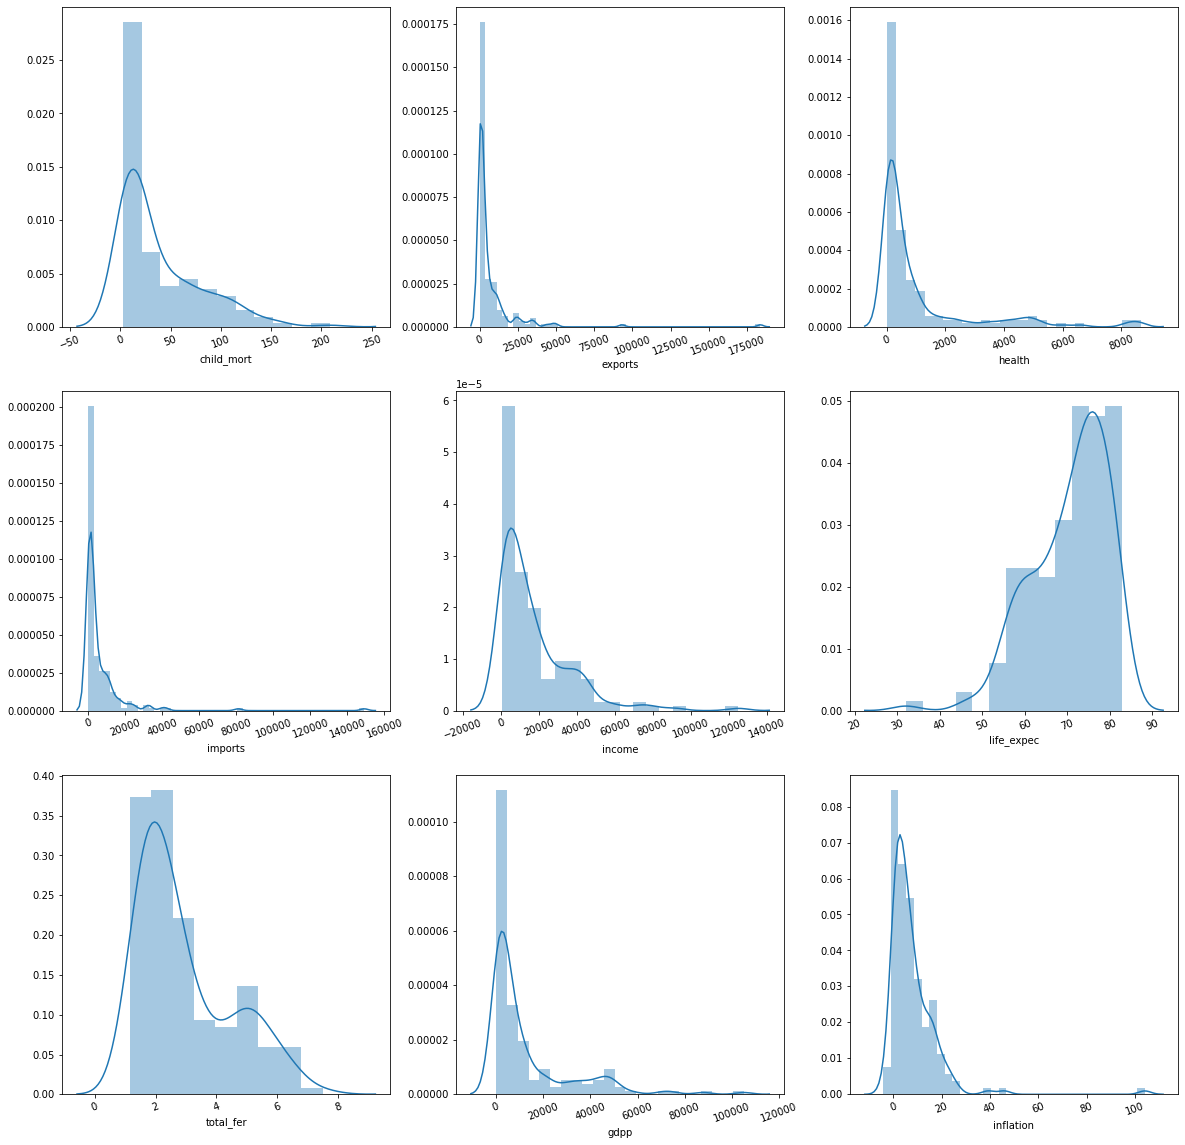

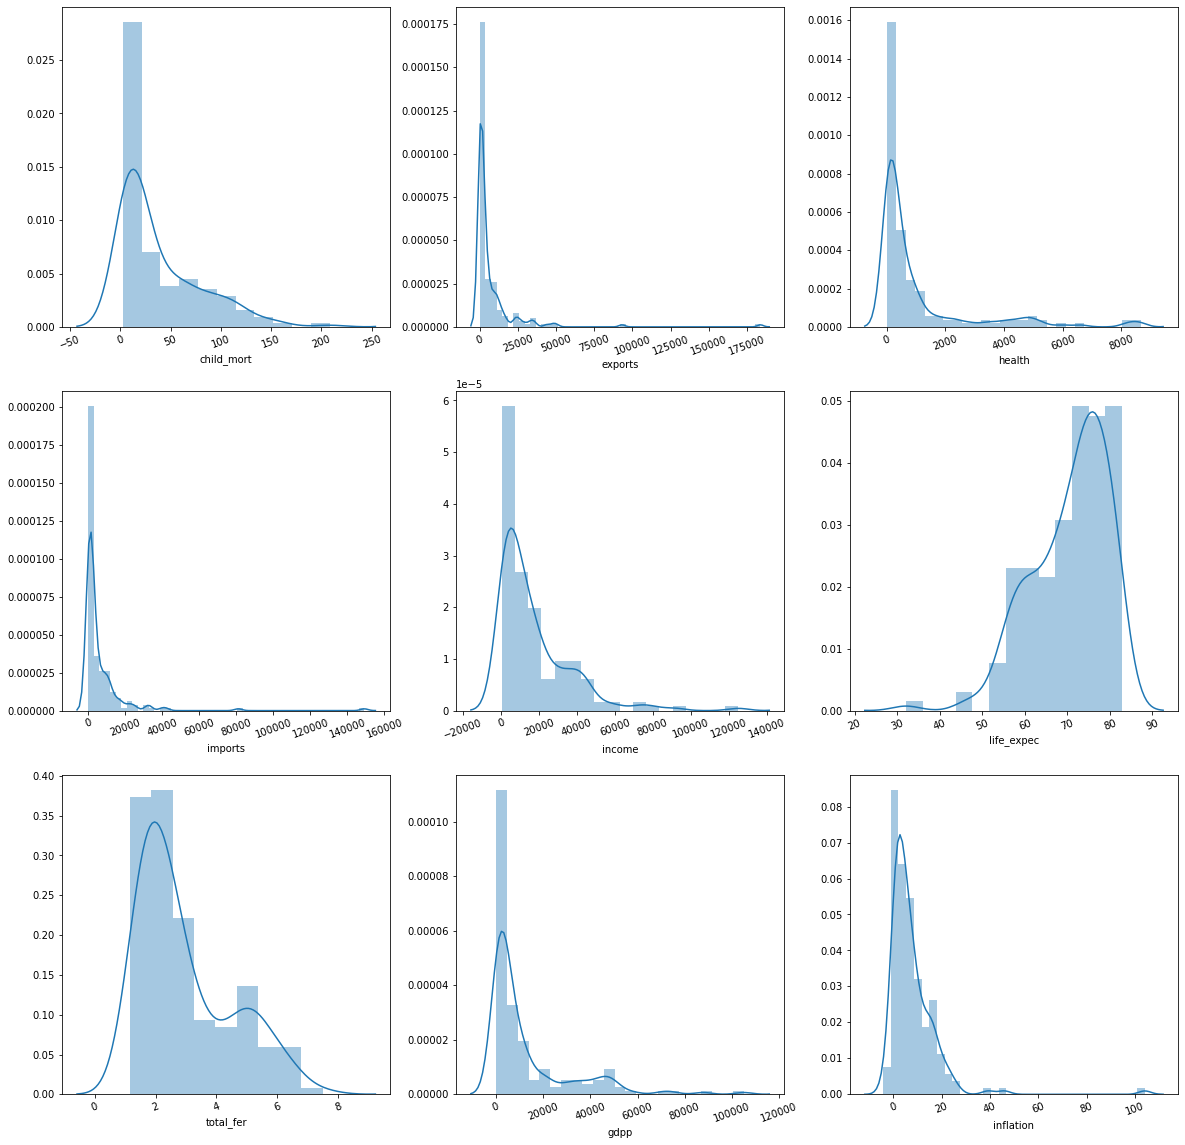

In [11]:
#Let's understand the distribution of the variables
#Let's plot a distribution plot
plt.figure(figsize=(20,20))
for i in enumerate(features): 
    ax = plt.subplot(3,3, i[0]+1)
    sns.distplot(dat[i[1]])
    plt.xticks(rotation = 20)

*There are observable peaks for all the variables, indicating a lot of the values lie within a specific range only with noticeable outliers*

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

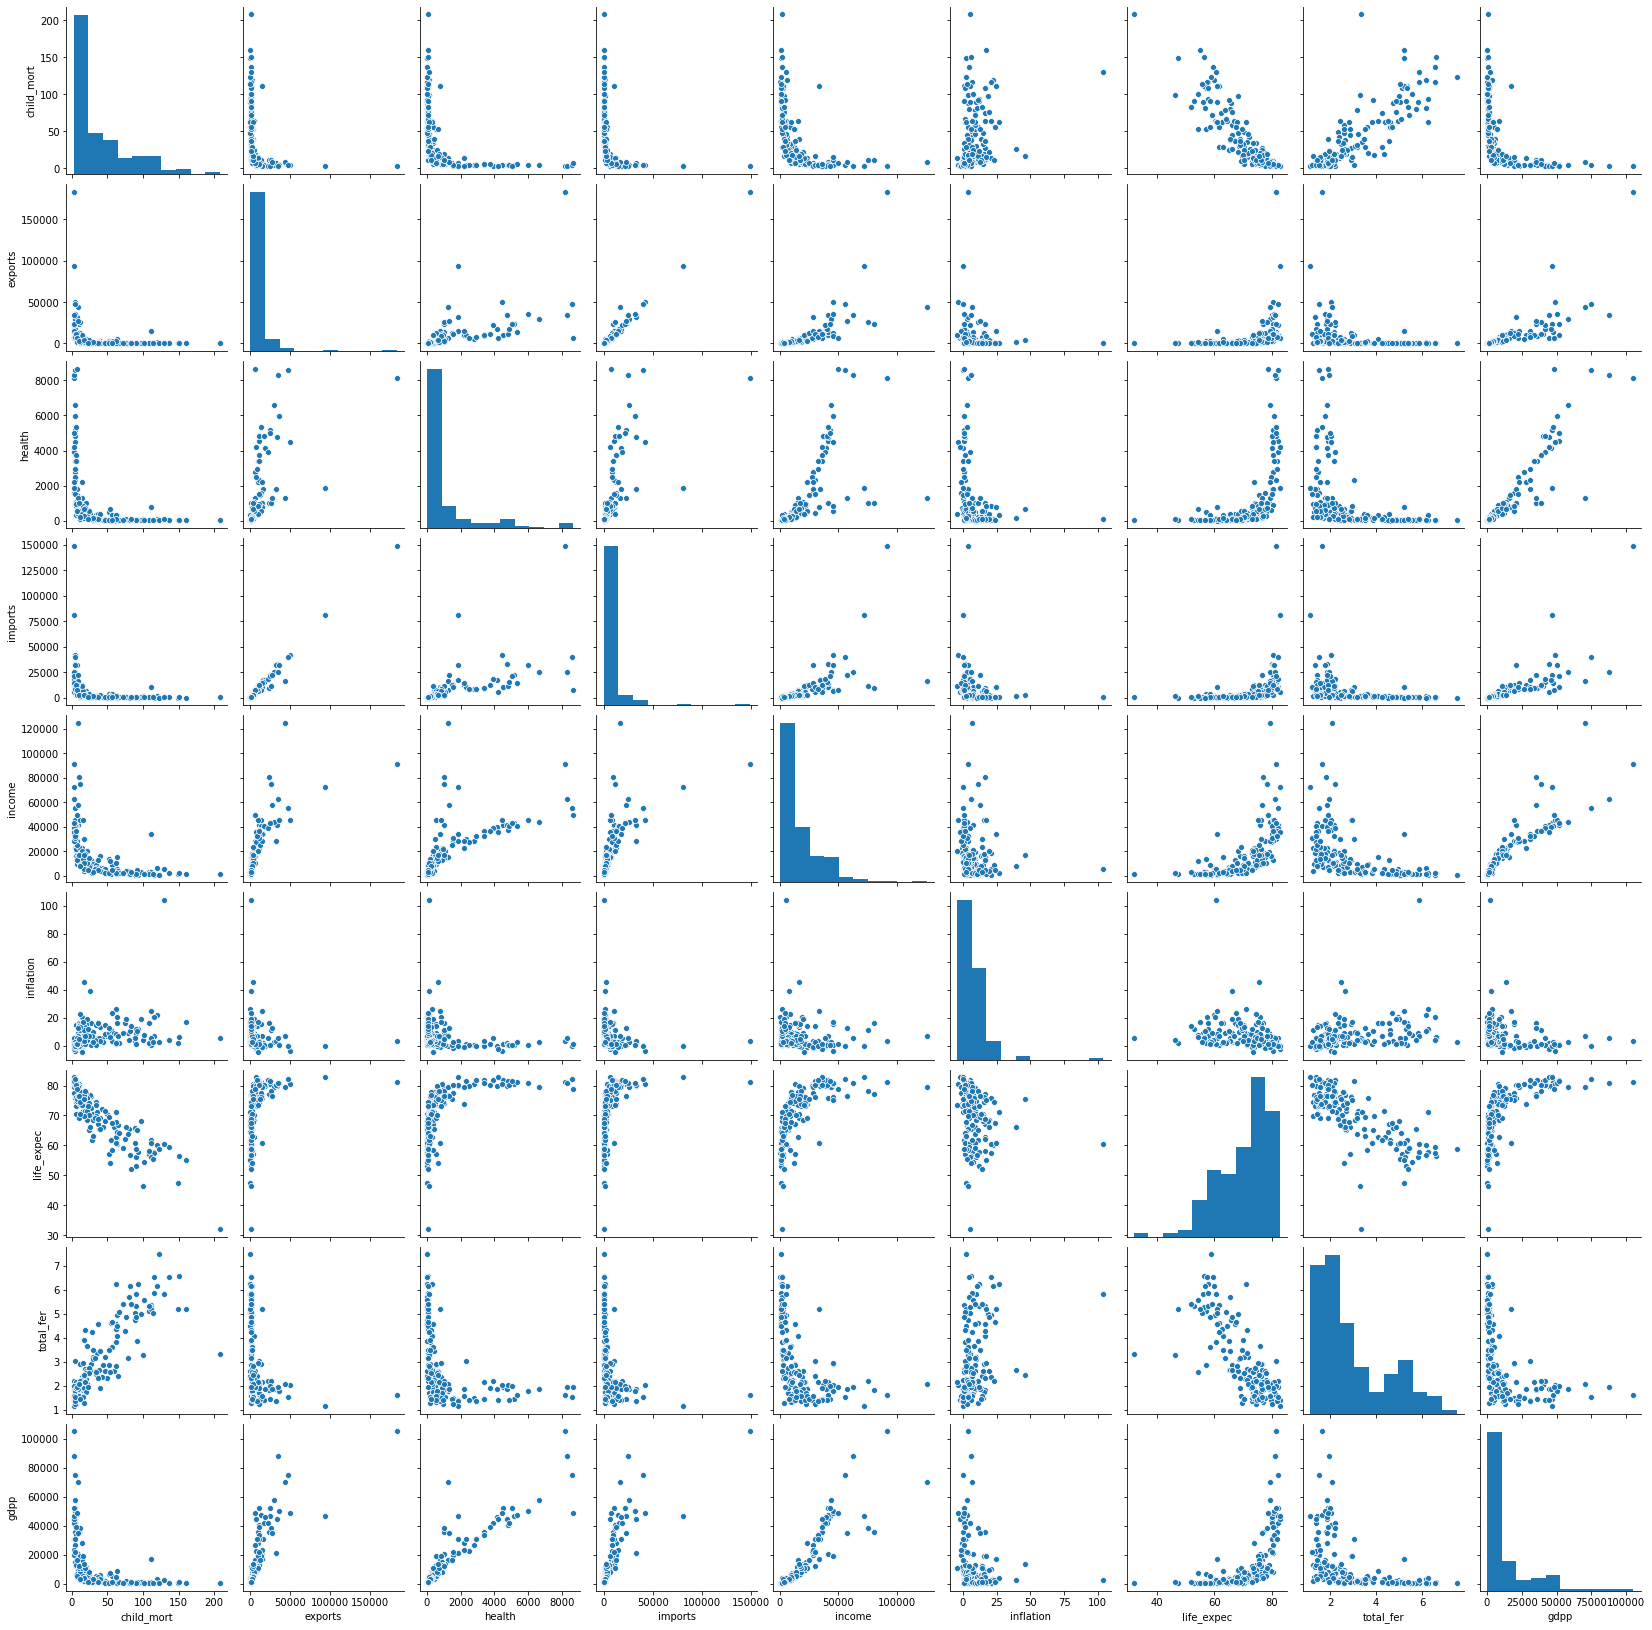

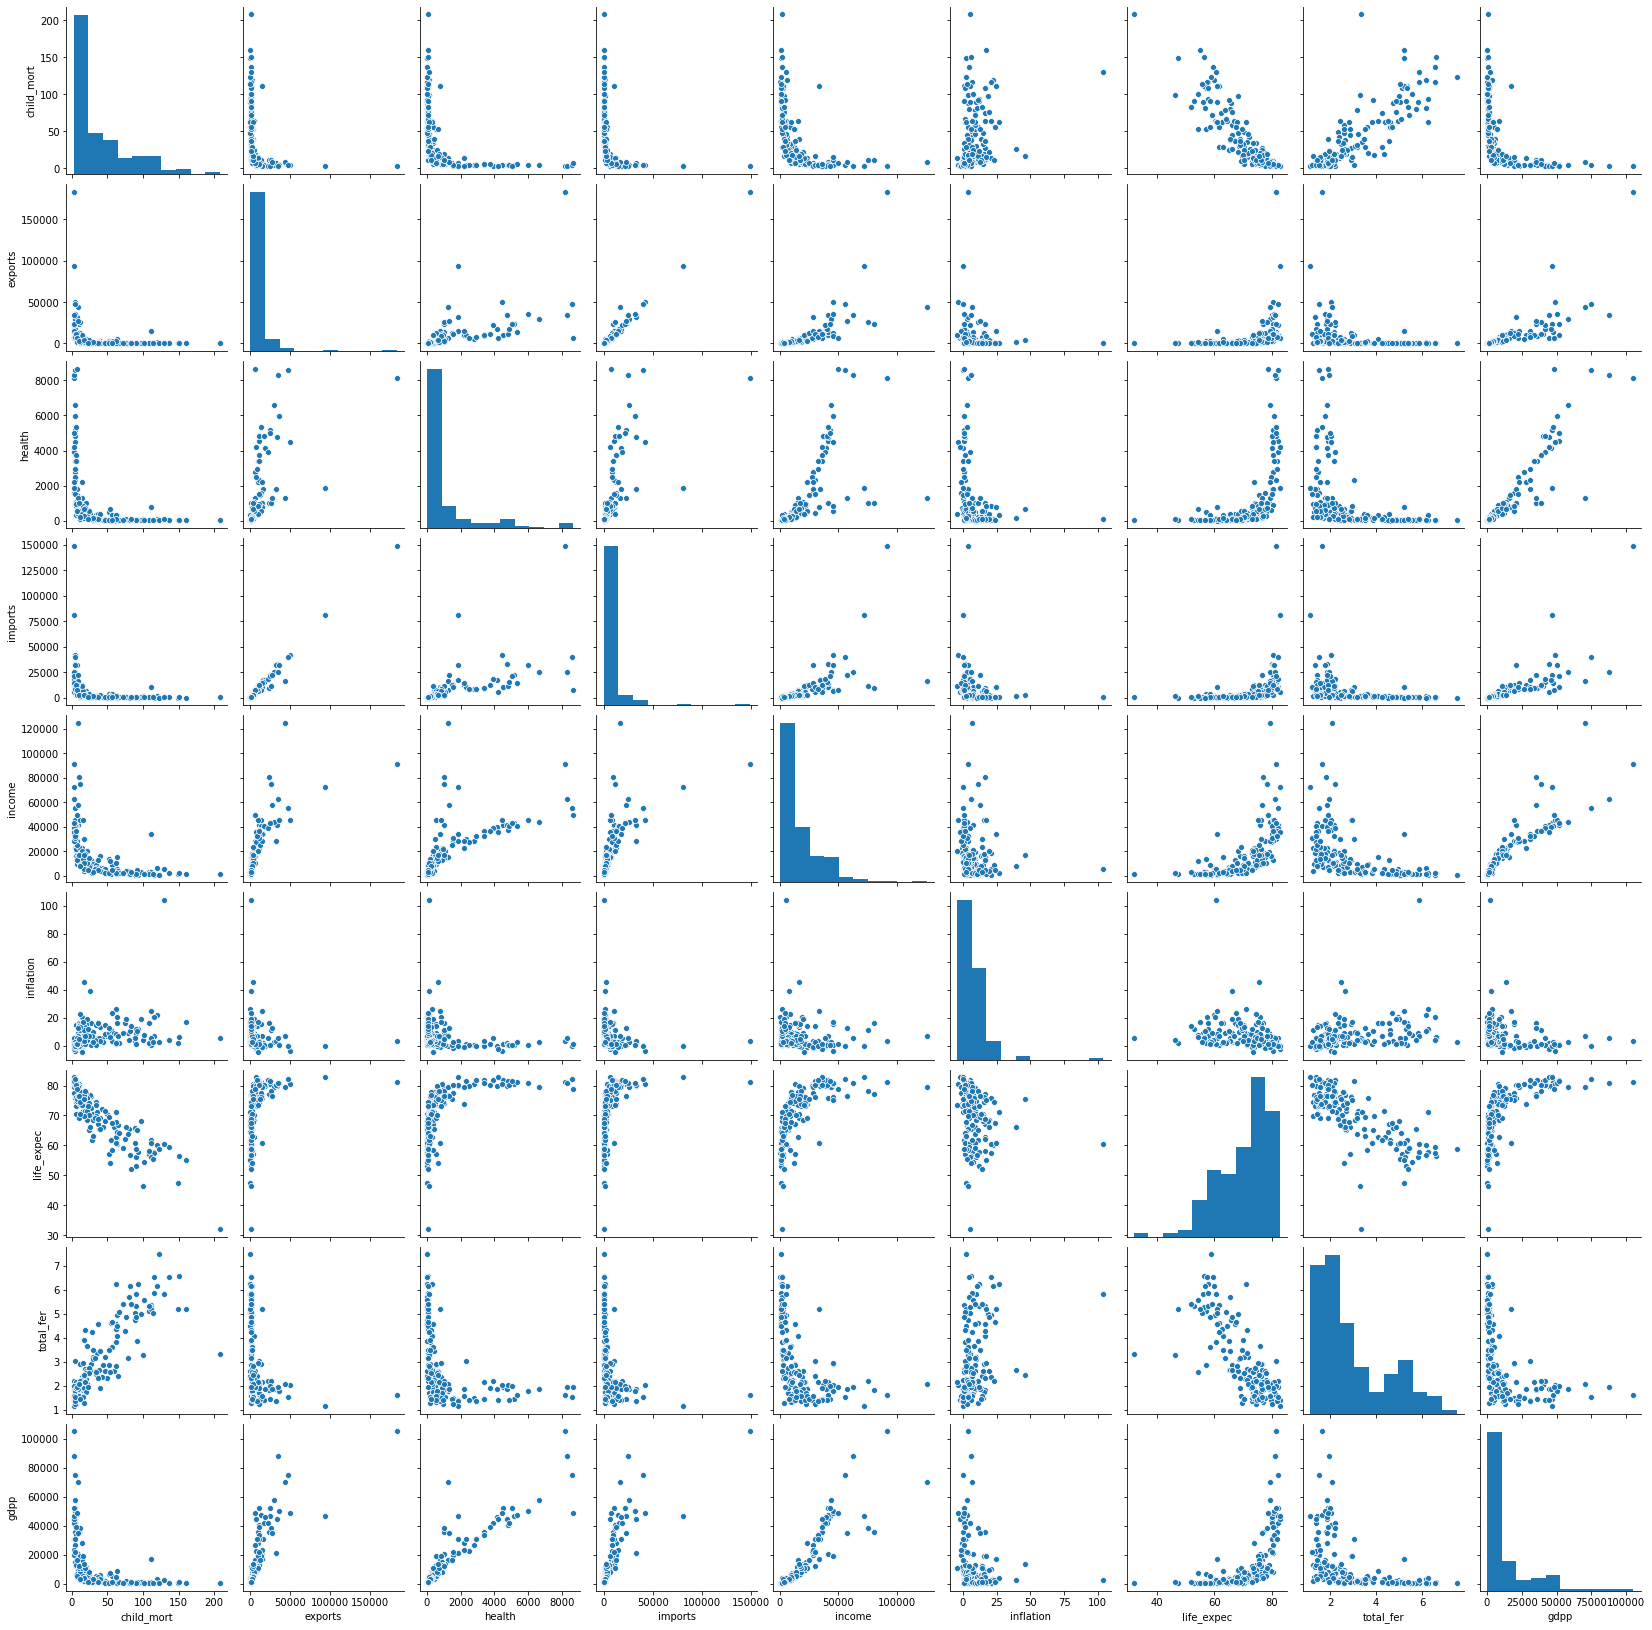

In [12]:
#Let's observe the pairwise relationship between the numeric variables
#First let's plot a pairplot
plt.figure(figsize=(20,20))
sns.pairplot(dat)
plt.show()

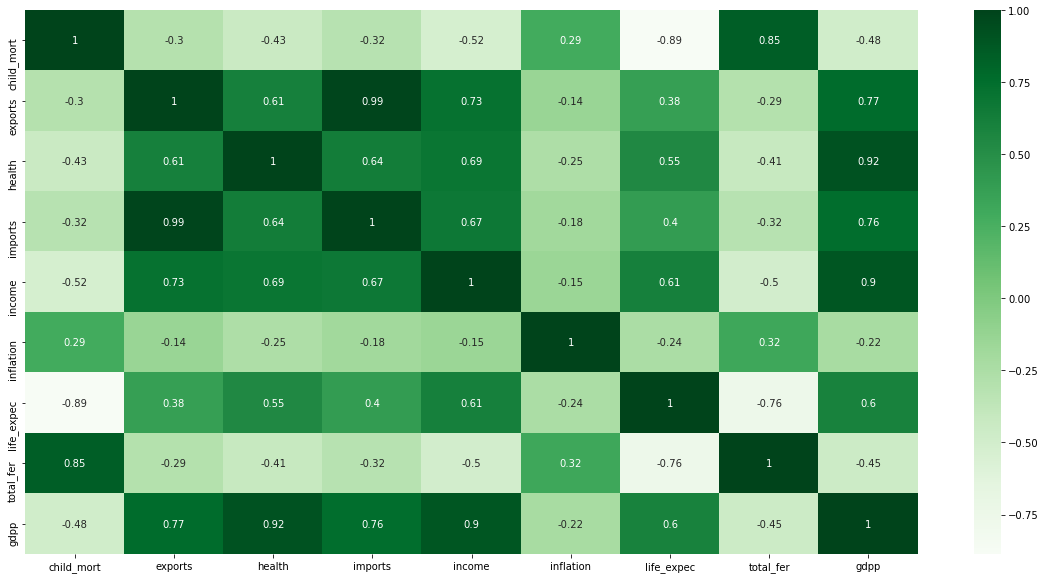

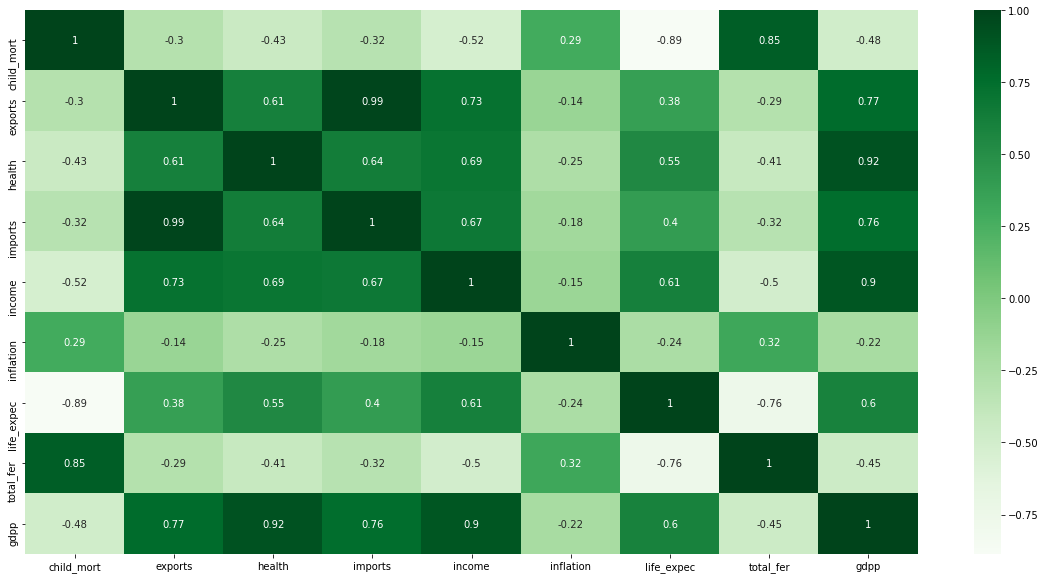

In [13]:
#Let's plot a correlation heatmap to even concretise this further
plt.figure(figsize = (20,10))        
sns.heatmap(dat.corr(),cmap = "Greens",annot = True)

From both the pair plot and the heat map, we observe a good amount of correlations between the different variables

##### Outlier analysis

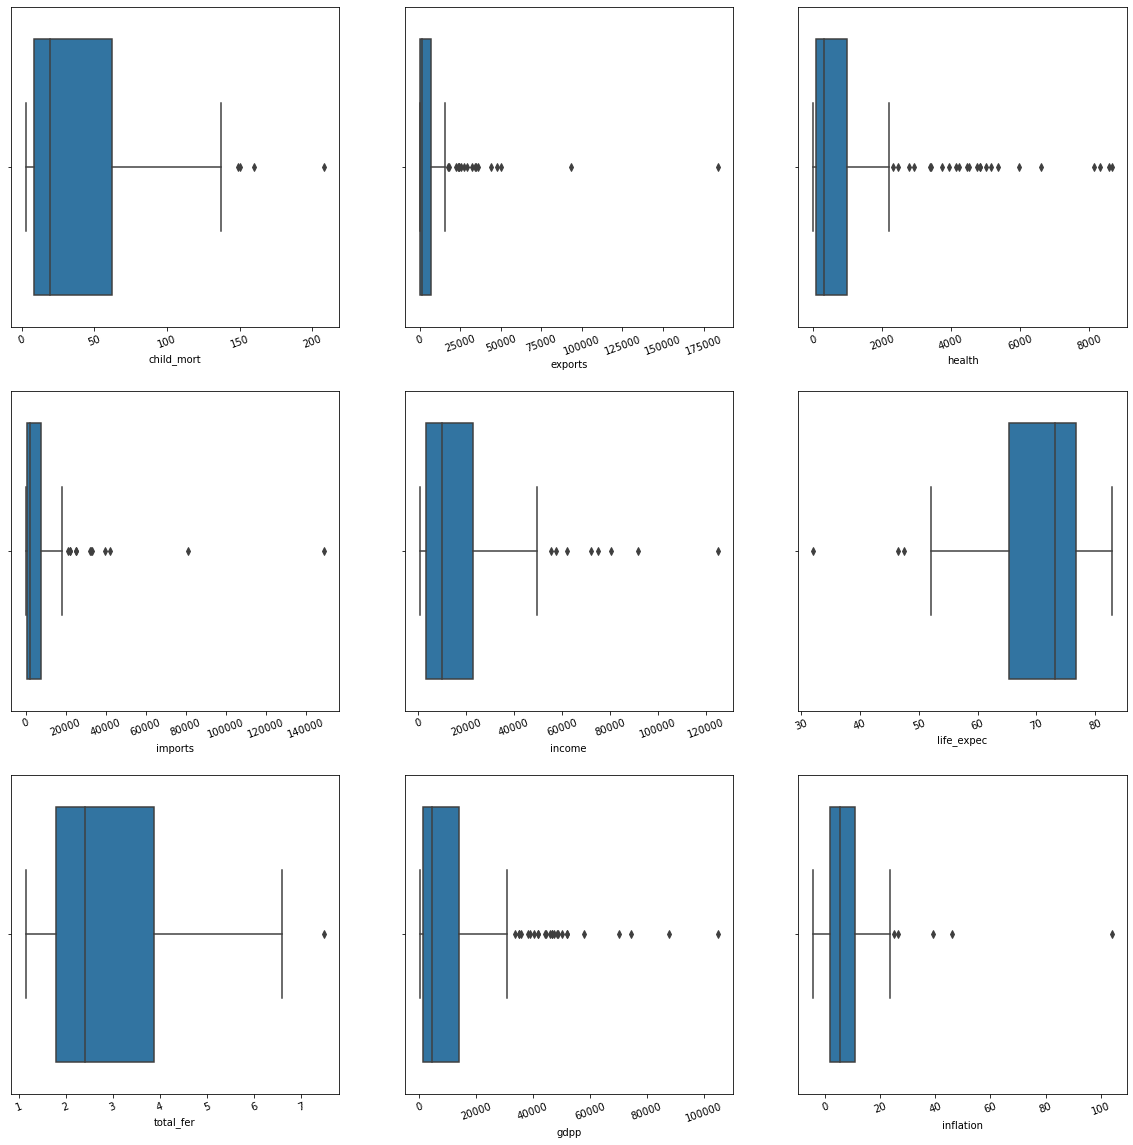

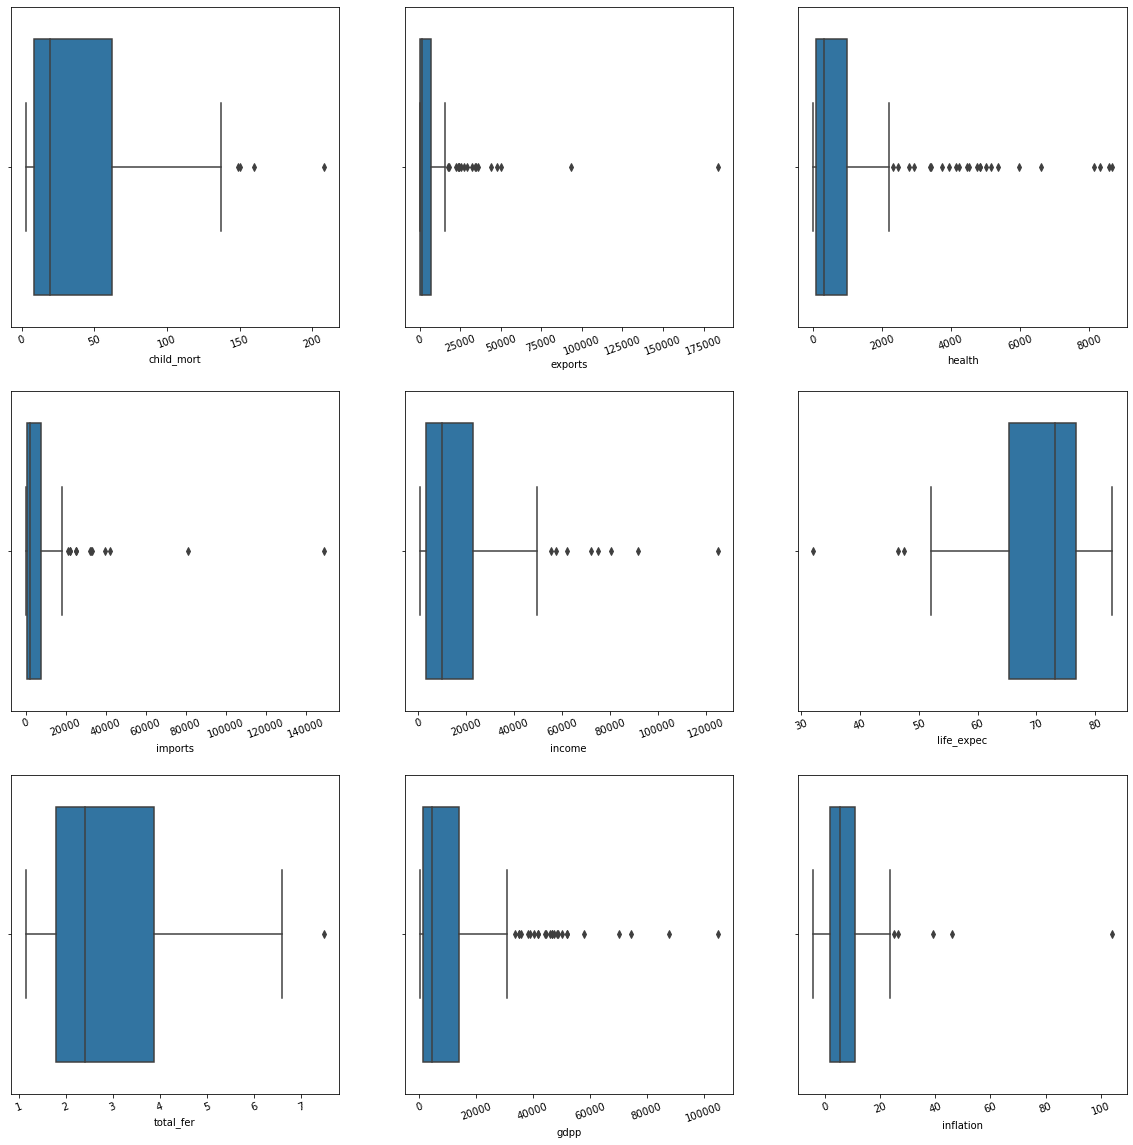

In [14]:
#First Let's do a boxplot
plt.figure(figsize=(20,20))
for i in enumerate(features): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(dat[i[1]])
    plt.xticks(rotation = 20)

#### Observations

- In many of the features, the values beyond the fences of the box plot show a gradual increase and therefore not the outright  presence of outliers.
- Therefore, we need to use qualifiers to remove the extreme values, instead of directly removing the values beyond the fences at both ends. Else we may lose a lot of countries in the process and the dataset contains only 167 values

#### Outlier Handling Strategy

Use the following qualifiers for the given dataset

- gdpp < 60000
- income < 100000
- child_mort < 200
- health < 8000
- imports < 80000
- exports < 75000
- total_fer < 7
- inflation < 40
- life_expec > 40

`Note`  -*However, we will be re-introducing these additional values later in the analysis when we find the final list of countries*

In [15]:
#Let's create the subset
dat2 = dat[(dat['gdpp']<60000) & (dat['income']<100000) & (dat['child_mort']<200) & (dat['health']<8000) & (dat['imports']<80000) & (dat['exports']<75000) & (dat['total_fer']<7) & (dat['inflation']<40) & (dat['life_expec']>40)]

In [16]:
dat2.shape

(157, 10)

(157, 10)

In [17]:
dat2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


*Only 10 countries were removed*

In [18]:
#The final matrix would only contain the data columns. Hence let's drop the country column
#We'll rejoin it with the cluster later
datm=dat2.drop(['country'],axis=1)
datm.head()  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
#Let's standardise the dataset now
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat3 = standard_scaler.fit_transform(datm)

In [20]:
rownames = list(dat2['country'])
rownames

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jam

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jam

In [21]:
colnames = list(dat.columns)
colnames

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [22]:
df = pd.DataFrame(dat3, columns = colnames[1:]) 

In [23]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.413887,-0.633847,-0.596864,-0.660443,-0.900268,0.328970,-1.731148,1.947641,-0.736507
1,-0.559748,-0.501027,-0.436692,-0.416230,-0.348282,-0.384255,0.699870,-0.880826,-0.485386
2,-0.272820,-0.431876,-0.494752,-0.498685,-0.151239,1.288581,0.724059,-0.039747,-0.459116
3,2.186179,-0.372583,-0.555267,-0.482690,-0.615650,2.196321,-1.259458,2.178259,-0.525145
4,-0.728686,0.035883,-0.105141,0.313563,0.260096,-0.823716,0.760343,-0.555247,0.090410


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.413887,-0.633847,-0.596864,-0.660443,-0.900268,0.328970,-1.731148,1.947641,-0.736507
1,-0.559748,-0.501027,-0.436692,-0.416230,-0.348282,-0.384255,0.699870,-0.880826,-0.485386
2,-0.272820,-0.431876,-0.494752,-0.498685,-0.151239,1.288581,0.724059,-0.039747,-0.459116
3,2.186179,-0.372583,-0.555267,-0.482690,-0.615650,2.196321,-1.259458,2.178259,-0.525145
4,-0.728686,0.035883,-0.105141,0.313563,0.260096,-0.823716,0.760343,-0.555247,0.090410


In [24]:
df['country'] = rownames

In [25]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.413887,-0.633847,-0.596864,-0.660443,-0.900268,0.328970,-1.731148,1.947641,-0.736507,Afghanistan
1,-0.559748,-0.501027,-0.436692,-0.416230,-0.348282,-0.384255,0.699870,-0.880826,-0.485386,Albania
2,-0.272820,-0.431876,-0.494752,-0.498685,-0.151239,1.288581,0.724059,-0.039747,-0.459116,Algeria
3,2.186179,-0.372583,-0.555267,-0.482690,-0.615650,2.196321,-1.259458,2.178259,-0.525145,Angola
4,-0.728686,0.035883,-0.105141,0.313563,0.260096,-0.823716,0.760343,-0.555247,0.090410,Antigua and Barbuda


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.413887,-0.633847,-0.596864,-0.660443,-0.900268,0.328970,-1.731148,1.947641,-0.736507,Afghanistan
1,-0.559748,-0.501027,-0.436692,-0.416230,-0.348282,-0.384255,0.699870,-0.880826,-0.485386,Albania
2,-0.272820,-0.431876,-0.494752,-0.498685,-0.151239,1.288581,0.724059,-0.039747,-0.459116,Algeria
3,2.186179,-0.372583,-0.555267,-0.482690,-0.615650,2.196321,-1.259458,2.178259,-0.525145,Angola
4,-0.728686,0.035883,-0.105141,0.313563,0.260096,-0.823716,0.760343,-0.555247,0.090410,Antigua and Barbuda


In [26]:
#We'll be using both dat3 and df for our analysis 

## Modelling

As we checked previously the dataset looks of similar magnitude. Hence no further standardisation is necessary.

Let's proceed to calculating the Hopkins statistic to ensure that the data is good for clustering.

##### Hopkins Statistic

In [27]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
hopkins(df.drop(['country'],axis=1))

0.8815502299457575

0.8815502299457575

Hopkins score shows very good tendency to cluster. We can now proceed to the modelling steps

##### K-means Clustering

In [29]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(dat3)
    sse_.append([k, silhouette_score(dat3, kmeans.labels_)])

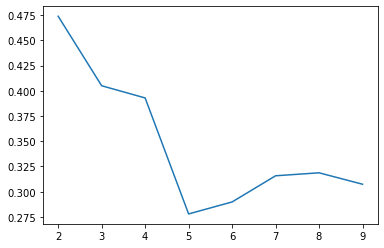

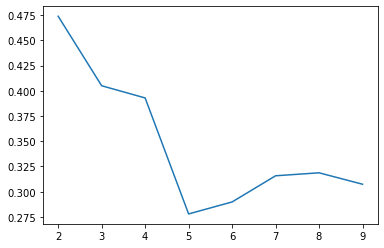

In [30]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

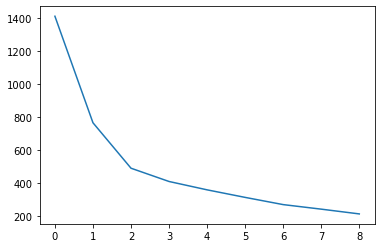

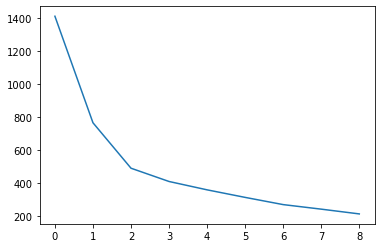

In [31]:
#The sihouette score reaches a peak at around 3 clusters indicating that it might be the ideal number of clusters.
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state = 42)
    model_clus.fit(dat3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Notice that here on the X-axis 0  means 1 cluster, 1 means 2 clusters and so on.

In [32]:
#A distinct elbow is formed at around 2-3 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50)
model_clus3.fit(dat3)

KMeans(max_iter=50, n_clusters=3)

KMeans(max_iter=50, n_clusters=3)

In [33]:
Cids = list(model_clus3.labels_)

In [34]:
len(Cids)

157

157

In [35]:
dat_km = dat2.copy(deep = True)
dat_km['ClusterID'] = Cids
dat_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [36]:
dat_km.shape

(157, 11)

(157, 11)

In [37]:
dat_km['ClusterID'].value_counts()

1    81
2    45
0    31
Name: ClusterID, dtype: int64

1    81
2    45
0    31
Name: ClusterID, dtype: int64

In [38]:
dat_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


A good amount of countries are present in each of the clusters. Now let's start with our analysis

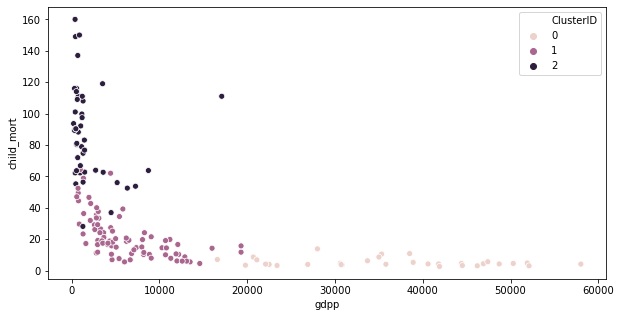

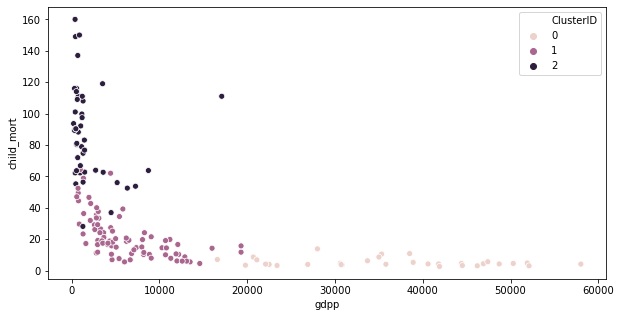

In [39]:
#Each cluster has a good number of countries associated with it(at least 5% of the dataset under consideration)
#Let's do some further visualizations.
#We'll be visualising the clusters on the original variables
plt.figure(figsize=(10,5))
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=dat_km)
plt.show()

As you can see the clusters form a very distinct sequence (with a few exceptions here and there)
- Cluster 0 has medium to high child mortality with low gdpp
- Cluster 2 has low to medium child mortality with medium gdpp
- Cluster 1 has low child mortality and high gdpp

This gives us an idea that `Cluster 1` is the most developed cluster of countries whereas `Cluster 0` and `Cluster 2` may contain a lot of the underdeveloped countries

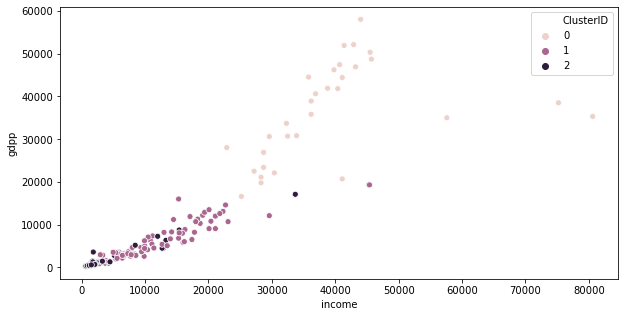

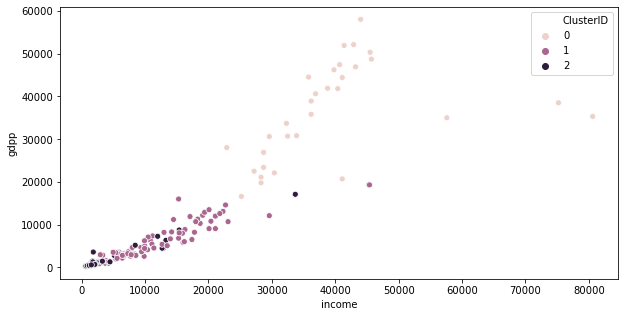

In [40]:
#Let's create some more plots
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',data=dat_km)

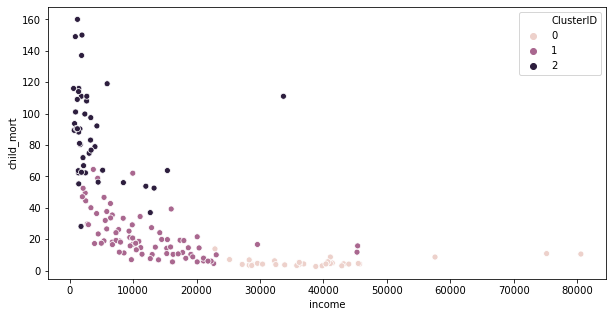

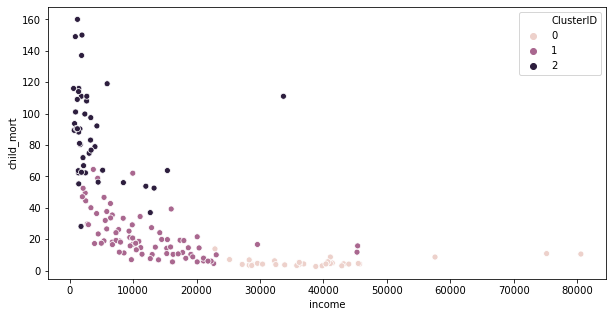

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='child_mort',hue='ClusterID',data=dat_km)

In both the cases we observe similar plots as we got in the intial one as well. However there seems to be some form of overlap as well

In [42]:
#Let's do a groupby and observe how the means of the variables in the  clusters change according to the clusterID

In [43]:
dat_km.groupby(['ClusterID'])[['child_mort','exports','imports','income','health','gdpp','total_fer','inflation','life_expec']].mean()

,child_mort,exports,imports,income,health,gdpp,total_fer,inflation,life_expec
ClusterID,,,,,,,,,
0,5.296774,18031.867742,16237.748387,39067.741935,3286.760000,36293.548387,1.764839,2.507452,79.774194
1,22.011111,2776.096278,2906.960754,12252.962963,389.731610,6198.419753,2.287160,7.236531,72.907407
2,87.473333,920.600378,859.839533,3991.311111,118.435838,1962.266667,4.954667,10.216333,59.824444


,child_mort,exports,imports,income,health,gdpp,total_fer,inflation,life_expec
ClusterID,,,,,,,,,
0,5.296774,18031.867742,16237.748387,39067.741935,3286.760000,36293.548387,1.764839,2.507452,79.774194
1,22.011111,2776.096278,2906.960754,12252.962963,389.731610,6198.419753,2.287160,7.236531,72.907407
2,87.473333,920.600378,859.839533,3991.311111,118.435838,1962.266667,4.954667,10.216333,59.824444


##### Insights

- Cluster 0 is the least developed cluster and hence contains the countries in the direst need of aid.
- It has the lowest gdpp avg, lowest income avg. and also the highest child_mortality.
- We'll be using the mean values obtained here to get the final list of countries

In [44]:
dat_km[dat_km['ClusterID']== 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,0


##### Hierarchical Clustering
Let's check if hierarchical clustering does a good job.

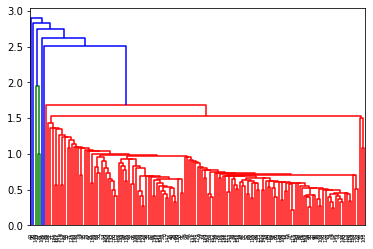

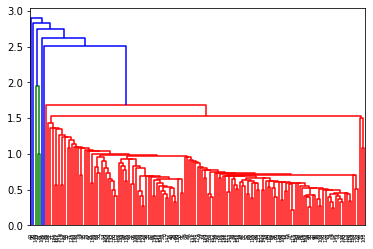

In [45]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure.
mergings = linkage(dat3, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

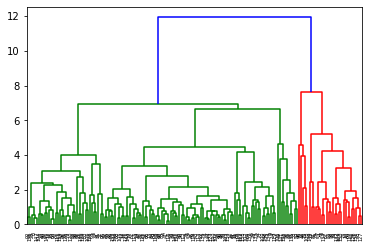

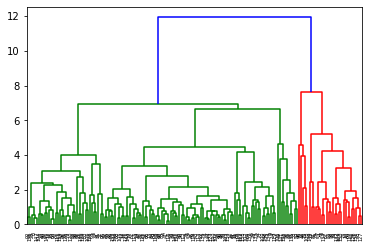

In [46]:
#We don't get good results here.
#Let's try complete linkage method
mergings = linkage(dat3, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [47]:
#Okay now we are seeing some good clusters here. Let's see if they make sense if we eliminate the barriers
clusterCut = list(cut_tree(mergings, n_clusters = 3).reshape(-1,))
dat_hc = dat2.copy(deep = True)
dat_hc['ClusterID'] = clusterCut
dat_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [48]:
dat_hc['ClusterID'].value_counts()

0    127
1     25
2      5
Name: ClusterID, dtype: int64

0    127
1     25
2      5
Name: ClusterID, dtype: int64

A disproportionate number of countries are in Cluster 0. This may indicate Hierarchical Clustering is not doing a good job here

In [49]:
## Hierarchical Clustering doesn't seem to do a good job here
## However let's go ahead and find the means of each variable by doing a groupby
dat_hc.groupby(['ClusterID'])[['child_mort','exports','imports','income','health','gdpp','total_fer','inflation','life_expec']].mean()

,child_mort,exports,imports,income,health,gdpp,total_fer,inflation,life_expec
ClusterID,,,,,,,,,
0,45.100787,2210.057603,2241.676379,9552.748031,298.635143,4811.606299,3.231339,8.293969,68.296063
1,5.260000,14509.192000,13110.752000,38616.000000,3088.463600,35276.000000,1.744800,2.549320,79.844000
2,4.820000,36374.320000,33013.020000,40920.000000,4729.836000,44500.000000,1.786000,1.311600,80.180000


,child_mort,exports,imports,income,health,gdpp,total_fer,inflation,life_expec
ClusterID,,,,,,,,,
0,45.100787,2210.057603,2241.676379,9552.748031,298.635143,4811.606299,3.231339,8.293969,68.296063
1,5.260000,14509.192000,13110.752000,38616.000000,3088.463600,35276.000000,1.744800,2.549320,79.844000
2,4.820000,36374.320000,33013.020000,40920.000000,4729.836000,44500.000000,1.786000,1.311600,80.180000


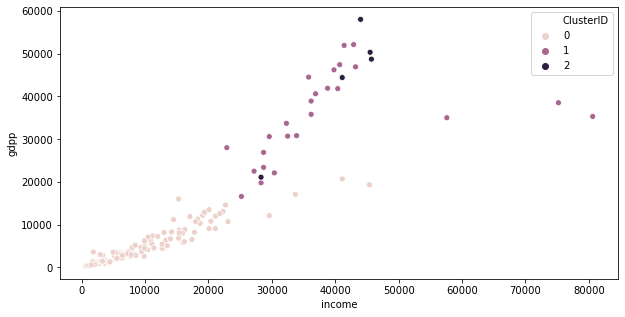

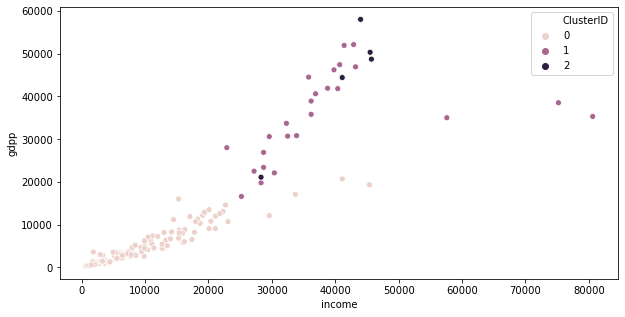

In [50]:
#Let's plot them as well
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',data=dat_hc)

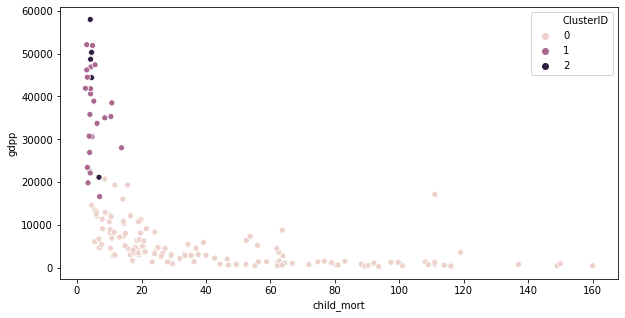

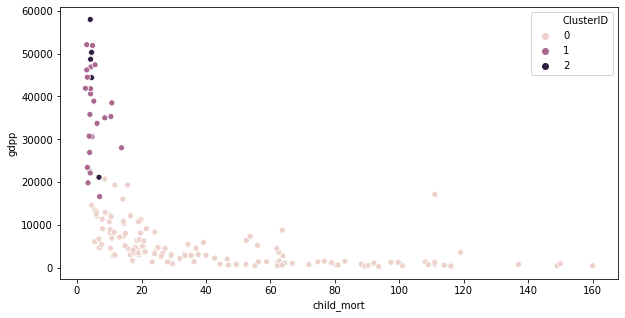

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',data=dat_hc)

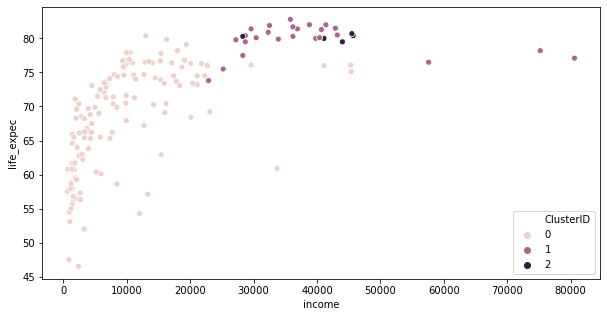

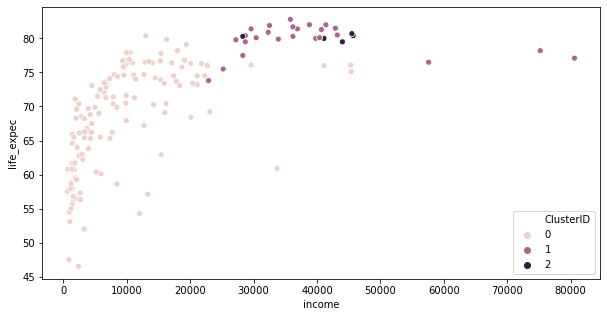

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='life_expec',hue='ClusterID',data=dat_hc)

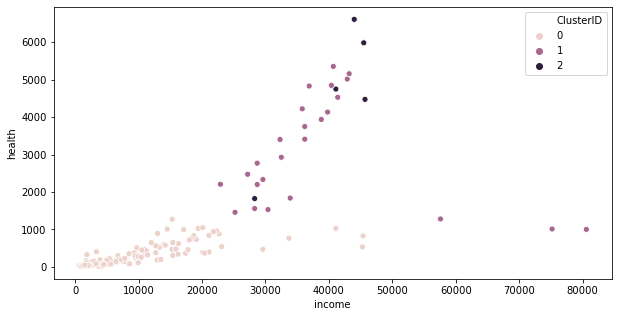

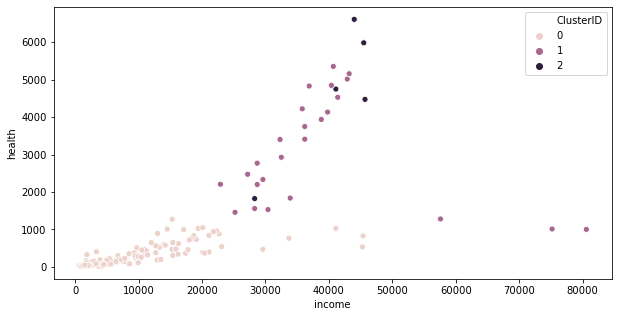

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='health',hue='ClusterID',data=dat_hc)

As you can see, the plots also suggest that the hierarchical clustering results are not that good.

##### Conclusion : We use the clusters formed during K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters here. For K-means part, we got Cluster 0 as the final list of countries that we need to focus on

## Final Results

In [54]:
#So we obtained the cluster 0 of the K-Means as our final result
dat_km[dat_km['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,0



*Now if we want we can subset this list even further based on the cluster mean*

*We'll be using `gdpp` `income` and `child_mort` to make the subsets*

##### Additional Analysis

In [55]:
#Let's go ahead and recompute the cluster centroids once again
dat_km[dat_km['ClusterID']==0].mean()

child_mort        5.296774
exports       18031.867742
health         3286.760000
imports       16237.748387
income        39067.741935
inflation         2.507452
life_expec       79.774194
total_fer         1.764839
gdpp          36293.548387
ClusterID         0.000000
dtype: float64

child_mort        5.296774
exports       18031.867742
health         3286.760000
imports       16237.748387
income        39067.741935
inflation         2.507452
life_expec       79.774194
total_fer         1.764839
gdpp          36293.548387
ClusterID         0.000000
dtype: float64

So we can use these centroids as cutoffs to create the new subset

The first level of cutoffs are as follows

- child_mort > 87
- income < 3991
- gdpp < 1962

All the countries which fall in the above qualifiers would be the ideal list of countries that we need to focus on. 

*`Note` -  We chose only these 3 variables since these were the variables mentioned in the problem statement*

#### Final Subset

Here, we'll be using the original dataset `dat` to make the subsets. This will ensure that the values we removed in the outlier analysis which were actually important are also included here

In [56]:
#So the final list of countries
fin_list = dat[(dat.child_mort>87) & (dat.income<3991)&(dat.gdpp<1962)]

In [57]:
fin_list

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


In [58]:
fin_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     22 non-null     object 
 1   child_mort  22 non-null     float64
 2   exports     22 non-null     float64
 3   health      22 non-null     float64
 4   imports     22 non-null     float64
 5   income      22 non-null     int64  
 6   inflation   22 non-null     float64
 7   life_expec  22 non-null     float64
 8   total_fer   22 non-null     float64
 9   gdpp        22 non-null     int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     22 non-null     object 
 1   child_mort  22 non-null     float64
 2   exports     22 non-null     float64
 3   health      22 non-null     

### Results

- `fin_list` contains the final list of countries that are in the direst need of aid
- There are 22 countries in total and they can be further subsetted by using other variables as well.

Remarks - The final list of countries can be calculated using other logical approaches as well. You can create separate bins to find the list of countries here that you want to focus on. Or if your clustering results are good enough,  you can go ahead with the final list of countries obtained from the clustering results directly.